In [25]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 
from keras.applications.resnet import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np



Declaração de variaveis

In [26]:
train_path  = 'kneeKL299/train'
valid_path  = 'kneeKL299/vali'
test_path   = 'kneeKL299/test'

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet  import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

batch_size = 34


### Carregando as imagens de acordo com o path

In [28]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))



Found 5606 images belonging to 2 classes.


In [29]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                         zoom_range= 0.2, 
                                        horizontal_flip= True, 
                                        shear_range= 0.2          
 )

valid = validation_data_gen.flow_from_directory(directory= valid_path, target_size=(224,224))

Found 826 images belonging to 2 classes.


In [30]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 1605 images belonging to 2 classes.


In [31]:
# Classe biária - com artrose ou sem

class_type = {0:'Com artrose',  1 : 'Sem artrose'}

In [32]:
from keras.applications.resnet import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

# Rede convulacional de auxílio ResNet50

Essa rede foi usada para que o modelo que eu irei criar aprenda melhor

    - Resnet 50 rede convulacional 50 camadas de profundidade

Rede convulacional de auxílio - resnet 50
 - Essa rede tem 50 camadas de profundidade 50 layers
 - A variavel res me retorna uma rede neural treinada no dataset ImageNet 
 - O input shape é a imagem que ue vou mandar com 244x244 e o canal de cores 3 [r,g,b]
 - Consiste em 5 estágios, cada um com uma convolução e um identyty block
  

In [33]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top vai considerar novos pesos



  -  Isso serve para eu não retreinar a rede neural armazenada em 'res' novamente 

In [11]:
for layer in res.layers:           # Isso serve para eu não retreinar a rede neural armazenada em 'res' novamente 
  layer.trainable = False

X - > um vetor liear com os valores
X-> dense pla cassificar 
    - Sigmoid -> melhor funçao para esse modelo

In [ ]:
#model = tf.keras.models.Sequential([
 #   rescaling,
  #  data_augmentation,
   # model_transfer_learning,
    #tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.AveragePooling2D()
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(1, activation = 'sigmoid')
#])

#model.compile(
 #   optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
  #  loss = tf.keras.losses.BinaryCrossentropy(),
   # metrics = ['accuracy']
#)

#model.summary()

In [ ]:
#history = model.fit(
 #   dataset_train,
  #  validation_data = dataset_validation,
   # epochs = epochs,
    #callbacks = [
     #   early_stopping
    #]
#)

In [12]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# modelo com oa RES_NET50.
model = Model(res.input, x)

In [34]:

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Compilando o modelio
 - Função de otimização 'adam' (tesnorflow)
   - Adam é um método de descida de gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.
   - Categorical crossentropy_ 2 categorias sem artrose e com artrose
     - A rede binária não foi o melhor modelo então eu juntei o database e coloquei em duas categorias

In [30]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

- es = Se a accuracy não melhorar depois de 3 épocas ele para
- mc =  salva em um arquivo.h a cada medida que a accuaracy melhora

In [31]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

### Treinando modelo salvando o tempo

 - 45 passos por época
 - 30 épocas
 - callbacks =[es,mc]
 - time = toc - tic -> calcula o tempo

In [14]:
import time
from reader import feed
tic = time.perf_counter()

hist = model.fit_generator(train, steps_per_epoch= 45, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

toc = time.perf_counter()

time = toc - tic
print(time)



file = open('time_bin.txt', 'w')
file.write('tempo %s' % time)
file.close()

NameError: name 'es' is not defined

## Carregando modelos para teste

In [22]:
## Carrega o modelo
from keras.models import load_model
model = load_model("bestmodel.h5")

# Vendo a performance do modelo

In [23]:
h = hist.history
h.keys()

NameError: name 'hist' is not defined

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

NameError: name 'h' is not defined

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

NameError: name 'h' is not defined

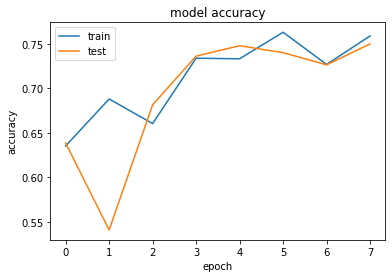

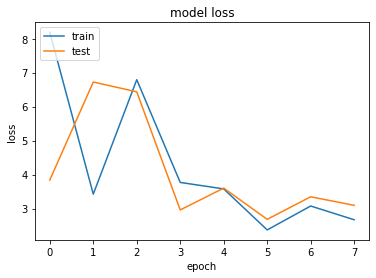

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Calcula a acurácia do modelo com evaluate_generator

In [37]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

C:\Users\yagok\AppData\Local\Temp\ipykernel_1744\1957840212.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.2610591948032379 %


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 1s 825ms/step
The given X-Ray image is of type = Com artrose

1/1 [==============================] - 0s 100ms/step
The chances of image being Com artrose is : 100.0 percent

1/1 [==============================] - 0s 100ms/step
The chances of image being Sem artrose is : 1.0881738218837533e-10 percent


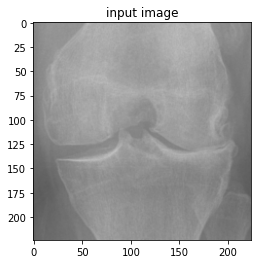

Com artrose


In [21]:
# path for that new image. ( you can take it either from google or any other scource)

path = 'C:/Users/yagok/OneDrive/Área de Trabalho/Códigos/trabalho1_git_pai-main/JOELINHO 2/test/4/9448133L.png'       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Com artrose is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Sem artrose is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

print(res)

In [39]:

classes_name = ('com artrose', 'sem artrose')
height, width = (224, 224)
val_pre_dataset = train_data_gen .flow_from_directory(valid_path, target_size = (height, width), 
                classes = classes_name, batch_size = batch_size, shuffle = False)

test_set = val_pre_dataset
test_set.reset()
predictions = model.predict(val_pre_dataset)
y_pred = np.argmax(predictions, axis=-1)

y_test = val_pre_dataset.labels
cm = confusion_matrix(y_test,y_pred)

print(cm)

cm2 = classification_report(val_pre_dataset.classes, y_pred)

print(classification_report(val_pre_dataset.classes, y_pred))


file = open('time_bin_metrics.txt', 'w')
file.write('tempo %s' % cm2)
file.close()

Found 826 images belonging to 2 classes.
25/25 [==============================] - 31s 1s/step
[[247  98]
 [137 344]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       345
           1       0.78      0.72      0.75       481

    accuracy                           0.72       826
   macro avg       0.71      0.72      0.71       826
weighted avg       0.72      0.72      0.72       826

